In [ ]:
import pandas as pd
import numpy as np

np.random.choice([1, 0], p=[0.4, 0.6], size=3)

In [ ]:
np.array([1] * 50 + [0] * 50)

In [1]:
# Шаг 1: Сбор данных
# Предположим, у вас есть данные для 100 пользователей:

#     50 пользователей получили рекламное предложение (группа воздействия).
#     50 пользователей не получили предложение (контрольная группа).

import pandas as pd
import numpy as np

# генерация данных для 100 пользователей
np.random.seed(42)
n = 100
treatment = np.array([1] * 50 + [0] * 50)

outcome = np.concatenate(
    [
        np.random.choice([1, 0], p=[0.2, 0.8], size=50),
        np.random.choice([1, 0], p=[0.1, 0.9], size=50),
    ]
)
uplift_prediction = np.random.rand(n)

# создание DataFrame
data = {
    "user_id": range(1, n + 1),
    "treatment": treatment,
    "outcome": outcome,
    "uplift_prediction": uplift_prediction,
}

df = pd.DataFrame(data)
print(df.head())

   user_id  treatment  outcome  uplift_prediction
0        1          1        0           0.031429
1        2          1        0           0.636410
2        3          1        0           0.314356
3        4          1        0           0.508571
4        5          1        1           0.907566


In [2]:
# Шаг 2: Сортировка данных по uplift_prediction
df = df.sort_values(by="uplift_prediction", ascending=False).reset_index(drop=True)
print(df.head())

   user_id  treatment  outcome  uplift_prediction
0       55          0        0           0.985650
1       40          1        0           0.971782
2       41          1        1           0.962447
3       35          1        0           0.942910
4       79          0        0           0.936730


In [3]:
# Шаг 3: Инициализация переменных для расчёта CGain и Random
nt = 0
nt_1 = 0
nc = 0
nc_1 = 0

cgain = []
random = []
optimum = []

incremental_purchases = 0
opt_incremental_purchases = df["outcome"].sum()
opt_incremental_purchases

22

In [4]:
# Шаг 4: Расчёт CGain, Random и Optimum
# Optimum — максимальное значение uplift, которое мы можем получить на выборке.
# расчёт CGain, Random и Optimum
for i, row in df.iterrows():
    if row["treatment"] == 1:
        nt += 1
        if row["outcome"] == 1:
            nt_1 += 1
            incremental_purchases += 1
    else:
        nc += 1
        if row["outcome"] == 1:
            nc_1 += 1

    cgain.append(incremental_purchases)
    random.append(opt_incremental_purchases * (i + 1) / len(df))
    optimum.append(min(opt_incremental_purchases, (i + 1) * 1.0))

print(cgain)
print(random)
print(optimum)

[0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[0.22, 0.44, 0.66, 0.88, 1.1, 1.32, 1.54, 1.76, 1.98, 2.2, 2.42, 2.64, 2.86, 3.08, 3.3, 3.52, 3.74, 3.96, 4.18, 4.4, 4.62, 4.84, 5.06, 5.28, 5.5, 5.72, 5.94, 6.16, 6.38, 6.6, 6.82, 7.04, 7.26, 7.48, 7.7, 7.92, 8.14, 8.36, 8.58, 8.8, 9.02, 9.24, 9.46, 9.68, 9.9, 10.12, 10.34, 10.56, 10.78, 11.0, 11.22, 11.44, 11.66, 11.88, 12.1, 12.32, 12.54, 12.76, 12.98, 13.2, 13.42, 13.64, 13.86, 14.08, 14.3, 14.52, 14.74, 14.96, 15.18, 15.4, 15.62, 15.84, 16.06, 16.28, 16.5, 16.72, 16.94, 17.16, 17.38, 17.6, 17.82, 18.04, 18.26, 18.48, 18.7, 18.92, 19.14, 19.36, 19.58, 19.8, 20.02, 20.24, 20.46, 20.68, 20.9, 21.12, 21.34, 21.56, 21.78, 22.0]
[1.0, 2.0, 3.0, 4.

In [5]:
df.head(30)

,user_id,treatment,outcome,uplift_prediction
0,55,0,0,0.985650
1,40,1,0,0.971782
2,41,1,1,0.962447
3,35,1,0,0.942910
4,79,0,0,0.936730
5,13,1,0,0.929698
6,83,0,0,0.924694
7,51,0,0,0.908266
8,5,1,1,0.907566
9,93,0,0,0.900418


In [6]:
# Шаг 5: Расчёт метрик
from sklearn.metrics import auc

# расчёт площади под кривыми
qini_auc = auc(range(1, len(cgain) + 1), cgain)
random_auc = auc(range(1, len(random) + 1), random)

# расчёт Qini Score
qini_score = qini_auc - random_auc

# вывод Qini Score
print(f"Qini Score: {qini_score}")

Qini Score: -264.3900000000001


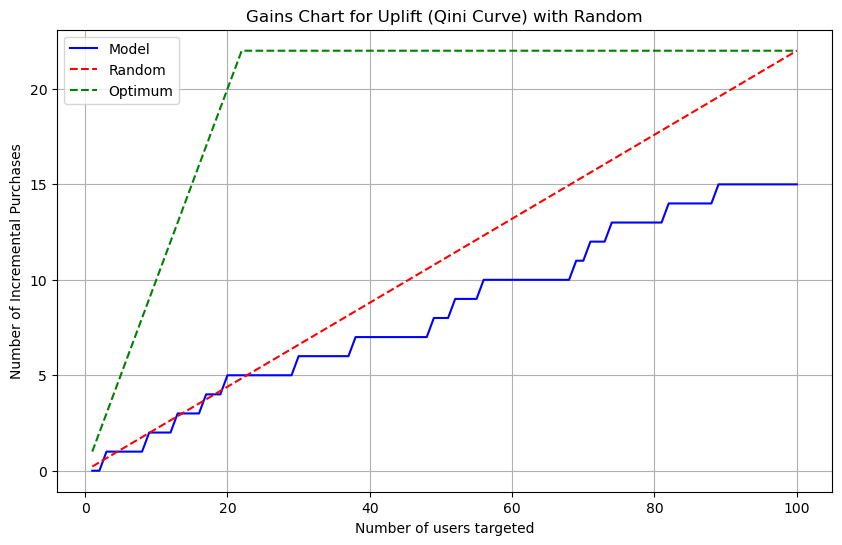

In [7]:
# Шаг 6: Построение графика
import matplotlib.pyplot as plt

# построение графиков
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cgain) + 1), cgain, label="Model", color="blue")
plt.plot(range(1, len(random) + 1), random, label="Random", color="red", linestyle="--")
plt.plot(
    range(1, len(optimum) + 1), optimum, label="Optimum", color="green", linestyle="--"
)
plt.xlabel("Number of users targeted")
plt.ylabel("Number of Incremental Purchases")
plt.title("Gains Chart for Uplift (Qini Curve) with Random")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
# Задание

# загружаем необходимые библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
# загружаем DataFrame
discount = pd.read_csv("discountuplift.csv", sep="\t")
discount

,recency,history,used_discount,used_bogo,is_referral,treatment,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,proba_CN,proba_CR,proba_TN,proba_TR,uplift_score,target_class
0,3,977.51,1,1,1,0,0,0,1,0,0,1,0.476095,0.159710,0.280660,0.083534,-0.043654,0
1,4,391.10,1,0,0,0,1,0,0,1,0,0,0.443035,0.087289,0.285081,0.184594,0.456858,0
2,7,72.37,1,0,1,1,0,0,1,0,0,1,0.514386,0.015488,0.429174,0.040952,0.115756,2
3,10,67.40,1,0,0,1,0,0,1,0,0,1,0.386800,0.125233,0.415839,0.072128,-0.193534,2
4,2,45.68,1,0,1,1,0,0,1,0,1,0,0.517491,0.022507,0.412372,0.047630,0.123726,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,5,104.04,1,0,1,0,0,0,1,0,1,0,0.443421,0.063945,0.450813,0.041821,-0.082280,0
12780,3,558.27,1,0,1,1,0,1,0,0,0,1,0.689539,0.027868,0.224104,0.058488,0.336249,2
12781,11,211.30,1,0,0,0,1,0,0,0,0,1,0.421402,0.076274,0.396279,0.106045,0.115697,0
12782,7,335.62,1,0,1,0,0,1,0,0,0,1,0.531513,0.019835,0.381351,0.067301,0.228063,0


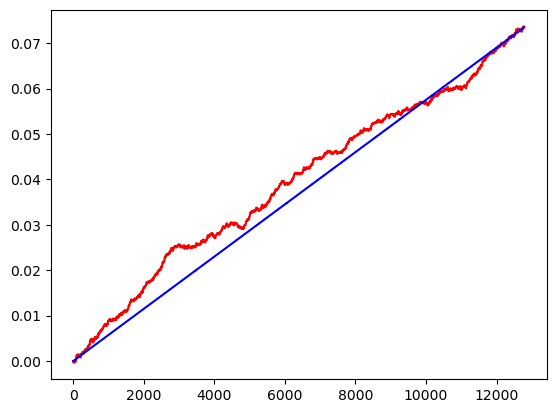

33.17995

In [2]:
# реализуем подсчёт Qini Score:
def qini_df(df):

    # 1. Отранжируем выборку по значению uplift в порядке убывания
    ranked = discount.sort_values(by="uplift_score", ascending=False).reset_index(
        drop=True
    )

    N_c = sum(ranked["target_class"] <= 1)
    N_t = sum(ranked["target_class"] >= 2)

    # посчитаем в отсортированном датафрейме основные показатели,
    # которые используются при расчёте Qini Score
    ranked["n_c1"] = 0
    ranked["n_t1"] = 0
    ranked.loc[ranked.target_class == 1, "n_c1"] = 1
    ranked.loc[ranked.target_class == 3, "n_t1"] = 1
    ranked["n_c1/nc"] = (
        ranked.n_c1.cumsum() / N_c
    )  # доля аудитории купившей без воздействия
    ranked["n_t1/nt"] = (
        ranked.n_t1.cumsum() / N_t
    )  # доля аудитории купившей после воздействия

    # посчитаем Qini-кривую и случайную прямую под ней
    ranked["uplift"] = round(ranked["n_t1/nt"] - ranked["n_c1/nc"], 5)

    # добавим случайную кривую
    ranked["random_uplift"] = round(
        ranked["uplift_score"].rank(pct=True, ascending=False)
        * ranked["uplift"].iloc[-1],
        5,
    )

    ranked["n"] = range(len(ranked))

    # немного кода для визуализации
    plt.plot(ranked["n"], ranked["uplift"], color="r")
    plt.plot(ranked["n"], ranked["random_uplift"], color="b")
    plt.show()

    # # расчёт Qini Score
    # qini_score = qini_auc - random_auc
    return (ranked["uplift"] - ranked["random_uplift"]).sum()


qini_df(discount)